In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**PCA**

In [ ]:
# DATA SELECTION + DATA STANDARDIZATION

labels=np.array(df.loc[:,['ocean_proximity','median_house_value']])
columns_dont_want = ['latitude','longitude','ocean_proximity','median_house_value']  #'median_house_value', longitude
select = [x for x in df.columns if x not in columns_dont_want]
data=np.array(df.loc[:, select])
data_mean = data.mean(axis=0)
data_std1 = data.std(axis=0)
data_std2=data.max(axis=0)-data.min(axis=0)

In [ ]:
########### TO OBTAIN BOTH THE OUTPUTS PRESENTED IN THE REPORT RUN ALTERNATIVELY
########### LINE 1 (Z-SCORING STANDARDIZATION) OR LINE 2 (BY RANGE STANDARDIZATION)

centered_data= (data - data_mean[None,:]) / data_std1[None,:]
#centered_data= (data - data_mean[None,:]) / data_std2[None,:]

(18336, 6)


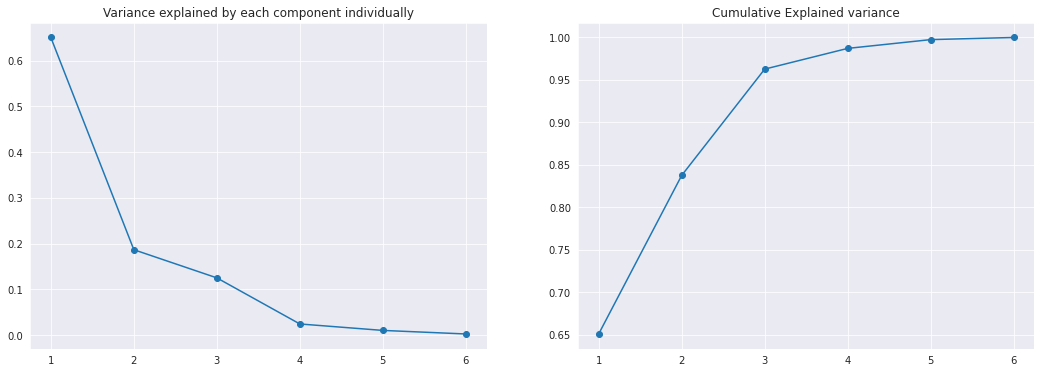

In [ ]:
# EXPLAINED VARIANCE AND CUMULATIVE EXPLAINED VARIANCE 

U, s, VT = np.linalg.svd(centered_data, full_matrices =False) 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (18,6))

axes[0].plot(np.arange(1,s.shape[0]+1),s**2/np.sum(s**2), 'o-')
axes[0].set_title('Variance explained by each component individually')

axes[1].plot(np.arange(1,s.shape[0]+1),np.cumsum(s**2)/np.sum(s**2), 'o-')
axes[1].set_title('Cumulative Explained variance')
print(centered_data.shape)

Text(0.5, 1.0, 'Z-score Normalized Data')

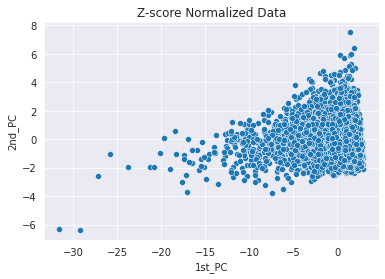

In [ ]:
# SCATTERPLOT OF THE DATA IN THE 2D PC PLANE

Phi=np.matmul(centered_data,VT.transpose())
column_values=['1st_PC','2nd_PC','3rd_PC','ocean_proximity','median_house_value'] 
ddflabels=np.hstack((reduced_labels[:,None],labels[:,1][:,None]))

ddf = pd.DataFrame(data = np.hstack((Phi[:,:3],ddflabels)), 
                  columns = column_values)
ax=sns.scatterplot(data = ddf, x='1st_PC' ,y='2nd_PC')

#z-score if you used centered_data in line 1 above or by range if centered_data in line 2
#ax.set_title("Normalized Data by range") 
ax.set_title("Z-score Normalized Data")  

Text(0.5, 1.0, '2D PC Plane')

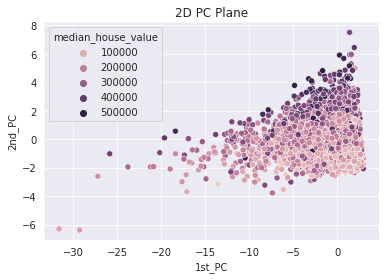

In [ ]:
# SCATTERPLOT OF THE DATA IN THE 2D PC PLANE + "MEDIAN HOUSE VALUE" INFORMATION
ax=sns.scatterplot(data = ddf, x='1st_PC' ,y='2nd_PC', 
                hue='median_house_value'
                )
ax.set_title("2D PC Plane")

In [ ]:
import plotly.express as px
fig = px.scatter_3d(ddf, x='1st_PC' ,y='2nd_PC' ,z = '3rd_PC', color = 'median_house_value')
fig.show()

In [ ]:
print(VT)
# housing_median_age	total_rooms	total_bedrooms	population	households	median_income

[[ 0.22193098 -0.48852597 -0.49202143 -0.47078436 -0.49335729 -0.07045993]
 [-0.50883161  0.05305942 -0.13517319 -0.14044988 -0.13064837  0.82656405]
 [ 0.82974318  0.12133116  0.02554927  0.08735314  0.06817802  0.53279774]
 [-0.05112846 -0.33661341 -0.3758626   0.84990278 -0.13328282  0.05201502]
 [-0.02534746 -0.77027511  0.29181549 -0.10248241  0.53681789  0.14900132]
 [-0.01032857  0.1928043  -0.71593392 -0.13478864  0.65493785 -0.05519856]]
